# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

# SPLITTING DATASET

In [7]:
x_train, y_train = train['features'],train['labels']
x_validation, y_validation = valid['features'],valid['labels']
x_test, y_test = test['features'],test['labels']

In [4]:
x_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

# IMAGES VISUALIZATION

5

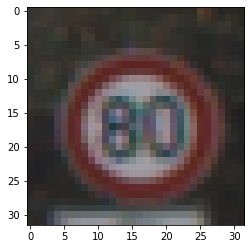

In [9]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

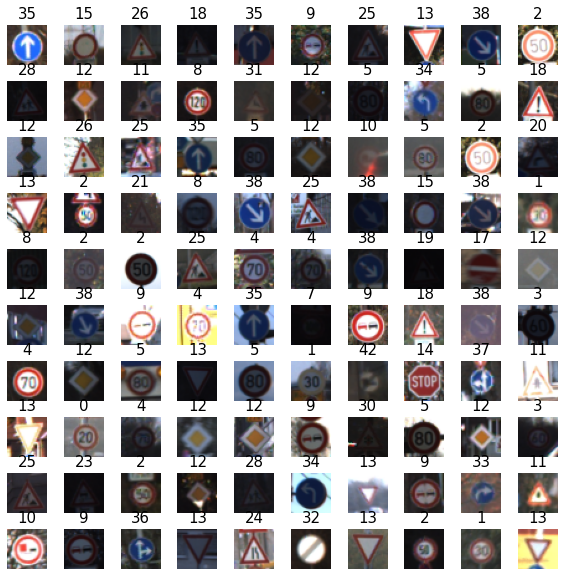

In [14]:

W_grid = 10
L_grid = 10



fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() 

n_training = len(x_train) 

for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize = 15)
    axes[i].axis('off')
    plt.subplots_adjust(hspace = 0.4)
    
    

        

# CONVERTING IMAGES TO GRAYSCALE AND PERFORMING NORMALIZATION

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(x_train, y_train)

In [18]:
X_train_gray = np.sum(X_train/3,axis = 3, keepdims = True)

In [19]:
X_train_gray.shape

(34799, 32, 32, 1)

In [21]:
X_train_gray_norm = (X_train_gray - 128)/128

In [23]:
#X_train_gray_norm

In [25]:
X_valid_gray = np.sum(x_validation/3,axis = 3, keepdims = True)
X_valid_gray_norm = (X_valid_gray - 128)/128
X_test_gray = np.sum(x_test/3,axis = 3, keepdims = True)
X_test_gray_norm = (X_test_gray - 128)/128

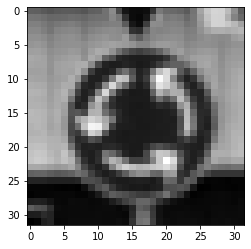

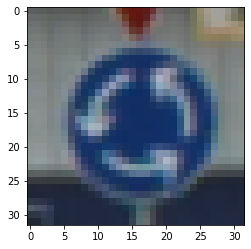

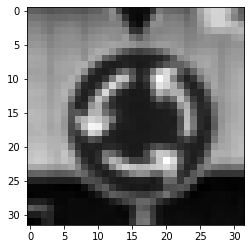

In [26]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#  BUILDING DEEP CNN MODEL

In [31]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5), activation = 'relu', input_shape = (32,32,1) ))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(.2))

CNN.add(layers.Conv2D(16,(5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())



CNN.add(layers.Flatten())
CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

#  COMPILING AND TRAINING THE MODEL

In [32]:
CNN.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

In [35]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_valid_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 24s 685us/sample - loss: 0.5215 - accuracy: 0.8553 - val_loss: 0.6187 - val_accuracy: 0.8204
Epoch 2/50
34799/34799 [==============================] - 24s 682us/sample - loss: 0.4640 - accuracy: 0.8717 - val_loss: 0.6051 - val_accuracy: 0.8327
Epoch 3/50
34799/34799 [==============================] - 24s 681us/sample - loss: 0.4131 - accuracy: 0.8862 - val_loss: 0.5594 - val_accuracy: 0.8356
Epoch 4/50
34799/34799 [==============================] - 24s 696us/sample - loss: 0.3838 - accuracy: 0.8926 - val_loss: 0.5446 - val_accuracy: 0.8537
Epoch 5/50
34799/34799 [==============================] - 24s 689us/sample - loss: 0.3462 - accuracy: 0.9041 - val_loss: 0.5073 - val_accuracy: 0.8671
Epoch 6/50
34799/34799 [==============================] - 24s 687us/sample - loss: 0.3128 - accuracy: 0.9133 - val_loss: 0.4897 - val_accuracy: 0.8633
Epoch 7/50
34799/34799 [=====================

#  TRAINED CNN MODEL PERFORMANCE 

In [36]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 6s 493us/sample - loss: 0.6191 - accuracy: 0.9120
Test Accuracy: 0.912034809589386


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training loss and validation loss')

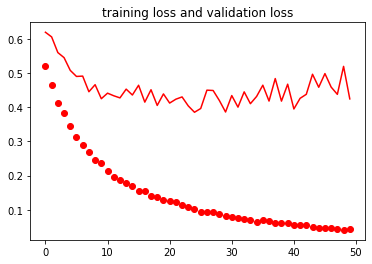

In [39]:
epochs = range((len(accuracy)))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title("training loss and validation loss")

Text(0.5, 1.0, 'training loss and validation loss')

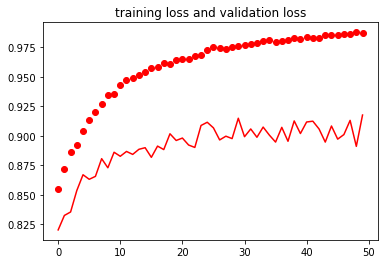

In [40]:
epochs = range((len(accuracy)))
plt.plot(epochs,accuracy,'ro',label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r',label = 'Validation accuracy')
plt.title("training loss and validation loss")

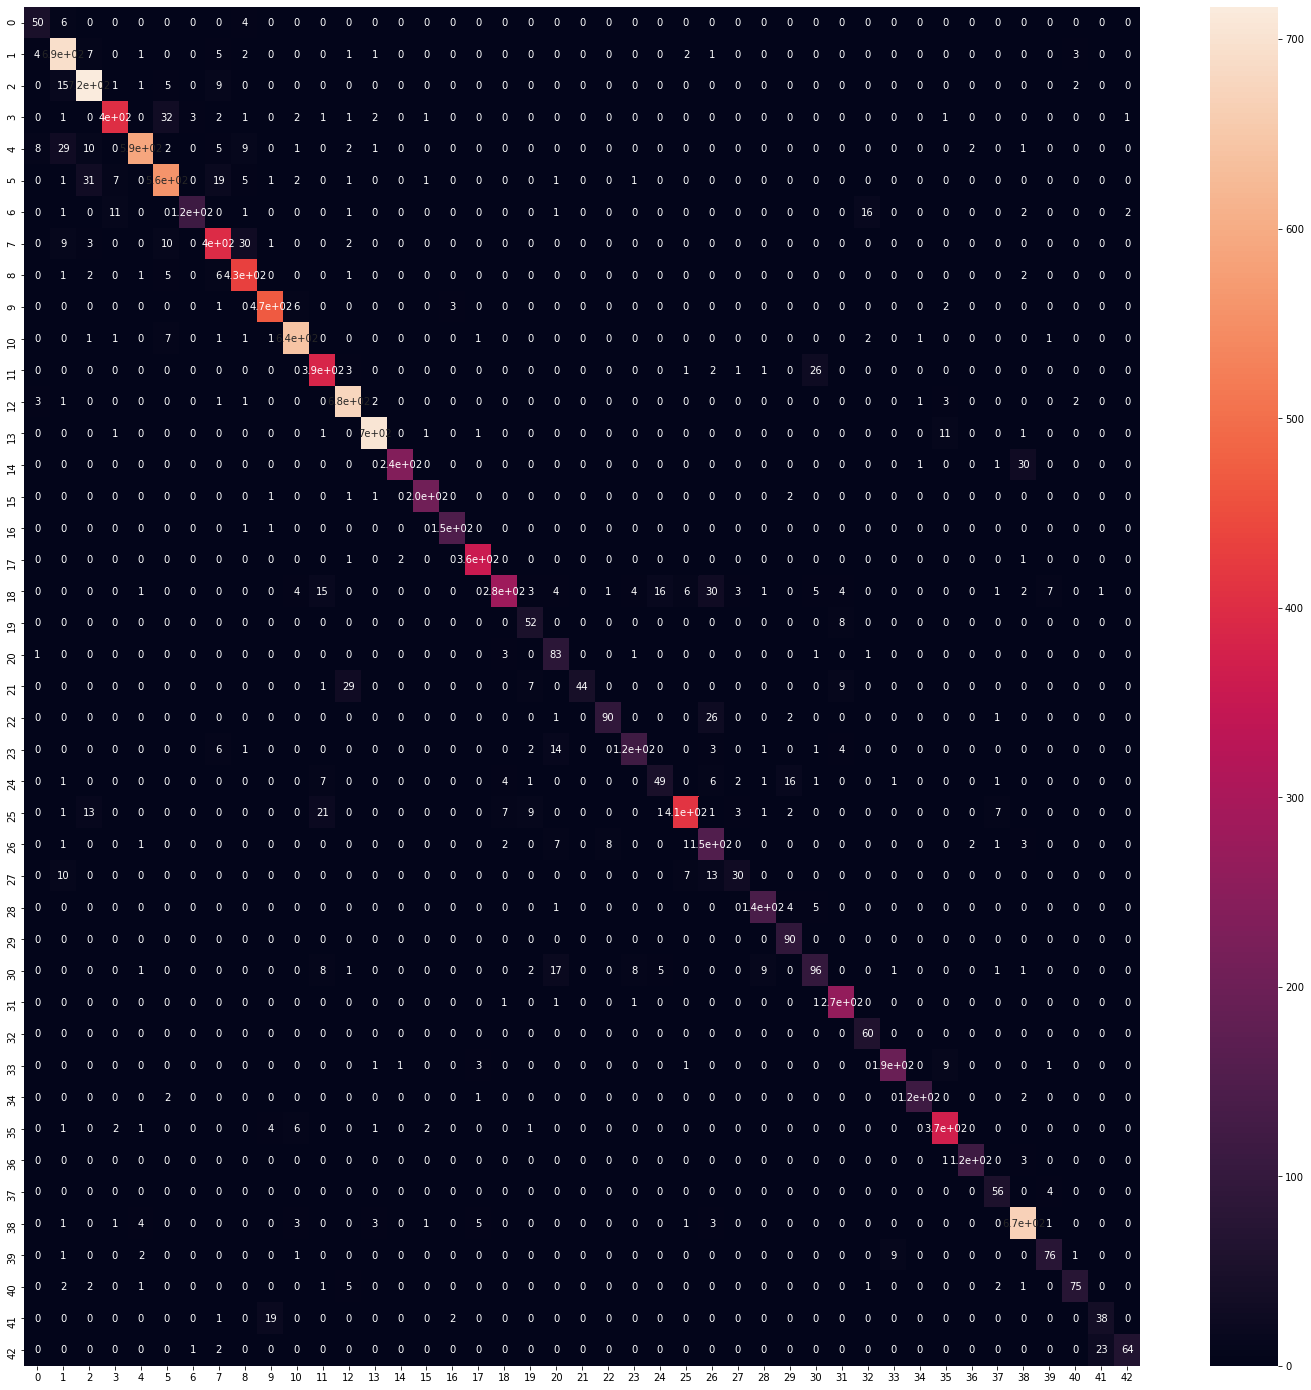

In [41]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

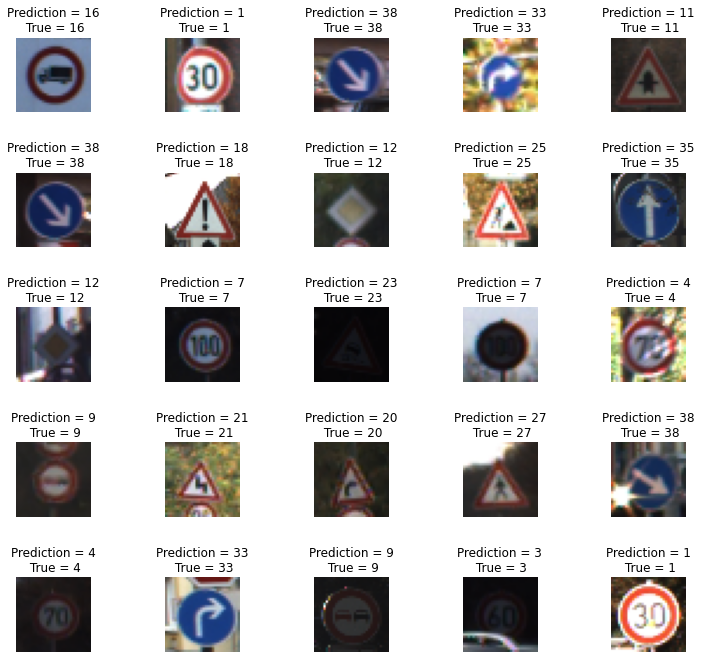

In [43]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }